In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
def describe_tensor(t):
    """
    Describes a few basic elements about any torch.Tensor.
    Prints out shape, number of elements, and rank.
    """
    print(f"Shape (Tensor.shape): {t.shape}")
    print(f"Number of elements (Tensor.numel()): {t.numel()}")
    print(f"Number of dimensions, or rank + 1 (Tensor.ndim): {t.ndim}")
    print(f"Tensor type (Tensor.dtype): {t.dtype}")

In [3]:
rank0tensor = torch.tensor(1)
rank0tensor

tensor(1)

In [4]:
describe_tensor(rank0tensor)

Shape (Tensor.shape): torch.Size([])
Number of elements (Tensor.numel()): 1
Number of dimensions, or rank + 1 (Tensor.ndim): 0
Tensor type (Tensor.dtype): torch.int64


In [5]:
rank1tensor = torch.tensor([1.,2,3])
rank1tensor

tensor([1., 2., 3.])

In [6]:
describe_tensor(rank1tensor)

Shape (Tensor.shape): torch.Size([3])
Number of elements (Tensor.numel()): 3
Number of dimensions, or rank + 1 (Tensor.ndim): 1
Tensor type (Tensor.dtype): torch.float32


In [7]:
rank2tensor = torch.tensor(
    [
     [1.,2,3],
     [4,5,6],
     [7,8,9]
    ]
)
rank2tensor

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [8]:
describe_tensor(rank2tensor)

Shape (Tensor.shape): torch.Size([3, 3])
Number of elements (Tensor.numel()): 9
Number of dimensions, or rank + 1 (Tensor.ndim): 2
Tensor type (Tensor.dtype): torch.float32


In [9]:
rank3tensor = torch.rand(3, 3, 3)
rank3tensor

tensor([[[0.9403, 0.5462, 0.8502],
         [0.9382, 0.2306, 0.1332],
         [0.6860, 0.9136, 0.7604]],

        [[0.2195, 0.1595, 0.1573],
         [0.1538, 0.5351, 0.2369],
         [0.8156, 0.2990, 0.2940]],

        [[0.6938, 0.5707, 0.0212],
         [0.0380, 0.5908, 0.0971],
         [0.6166, 0.5939, 0.3316]]])

In [10]:
describe_tensor(rank3tensor)

Shape (Tensor.shape): torch.Size([3, 3, 3])
Number of elements (Tensor.numel()): 27
Number of dimensions, or rank + 1 (Tensor.ndim): 3
Tensor type (Tensor.dtype): torch.float32


In [11]:
# We won't try to visualize this tensor since it doesn't fit neatly into my brain.
# This is just to show we can make big tensors, even if we don't have a practical use for them.
n_dim = 10
describe_tensor(torch.randn(*(tuple([3] * n_dim))))

Shape (Tensor.shape): torch.Size([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Number of elements (Tensor.numel()): 59049
Number of dimensions, or rank + 1 (Tensor.ndim): 10
Tensor type (Tensor.dtype): torch.float32


# Exercise 3.1: Torch `dtype`s

Read through the [documentation](https://pytorch.org/docs/stable/tensor_attributes.html#torch-dtype) on different tensor types.

Create a function that uses the [`Tensor.element_size()`](https://pytorch.org/docs/stable/generated/torch.Tensor.element_size.html#) and `Tensor.numel()` methods to calculate the memory footprint of a tensor in megabytes.
There are 1e6 bytes in a megabyte.
Then, create at least 3 tensors with the same shape but different `dtype`s like `torch.float16` and `torch.float32`.
What's the difference in the memory footprints of the following tensors?

<!-- startquestion -->


In [13]:
def memory_footprint(tensor):
    #raise NotImplementedError('Implement this function!')
    return tensor.numel() * tensor.element_size()

In [14]:
tensors = [
    torch.tensor(100, dtype=torch.float16),
    torch.tensor(100, dtype=torch.float32),
    torch.tensor(100, dtype=torch.int32),
    torch.tensor(100, dtype=torch.long) # I think this is int64
]

for t in tensors:
    print(f"""
    Tensor:
    {t}
    dtype: {t.dtype}
    memory footprint (MB): {memory_footprint(t)}
    ----------------
    """)


    Tensor:
    100.0
    dtype: torch.float16
    memory footprint (MB): 2
    ----------------
    

    Tensor:
    100.0
    dtype: torch.float32
    memory footprint (MB): 4
    ----------------
    

    Tensor:
    100
    dtype: torch.int32
    memory footprint (MB): 4
    ----------------
    

    Tensor:
    100
    dtype: torch.int64
    memory footprint (MB): 8
    ----------------
    


In [15]:
x = torch.ones(4).float()
x

tensor([1., 1., 1., 1.])

In [16]:
x * 4

tensor([4., 4., 4., 4.])

In [17]:
x + 4

tensor([5., 5., 5., 5.])

In [18]:
x - 2

tensor([-1., -1., -1., -1.])

In [19]:
x / 4

tensor([0.2500, 0.2500, 0.2500, 0.2500])

In [20]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x, y

(tensor([[0.0883, 0.5798],
         [0.4282, 0.4715]]),
 tensor([[0.6815, 0.8378],
         [0.3359, 0.2826]]))

In [21]:
x + y

tensor([[0.7698, 1.4176],
        [0.7641, 0.7542]])

In [22]:
x - y

tensor([[-0.5932, -0.2580],
        [ 0.0923,  0.1889]])

In [23]:
x * y

tensor([[0.0602, 0.4858],
        [0.1438, 0.1333]])

In [24]:
x / y

tensor([[0.1296, 0.6920],
        [1.2749, 1.6686]])

In [25]:
x = torch.rand(2, 4)
y = torch.rand(4)
x, y

(tensor([[0.1830, 0.1399, 0.1740, 0.7209],
         [0.7303, 0.1133, 0.3366, 0.5062]]),
 tensor([0.0956, 0.3148, 0.9018, 0.6841]))

In [26]:
torch.stack([x[0] * y, x[1] * y])

tensor([[0.0175, 0.0440, 0.1570, 0.4932],
        [0.0698, 0.0357, 0.3035, 0.3463]])

In [27]:
x * y

tensor([[0.0175, 0.0440, 0.1570, 0.4932],
        [0.0698, 0.0357, 0.3035, 0.3463]])

In [28]:
x = torch.rand(3, 2, 4)
x

tensor([[[0.0118, 0.3770, 0.9482, 0.6727],
         [0.3932, 0.6251, 0.7965, 0.7798]],

        [[0.9786, 0.3617, 0.1546, 0.6452],
         [0.4573, 0.1337, 0.0762, 0.7056]],

        [[0.2293, 0.0492, 0.0166, 0.3097],
         [0.9382, 0.5977, 0.4450, 0.0553]]])

In [29]:
torch.stack([torch.stack([i * y for i in a]) for a in x])

tensor([[[0.0011, 0.1187, 0.8551, 0.4602],
         [0.0376, 0.1968, 0.7183, 0.5335]],

        [[0.0935, 0.1138, 0.1394, 0.4414],
         [0.0437, 0.0421, 0.0687, 0.4827]],

        [[0.0219, 0.0155, 0.0150, 0.2119],
         [0.0897, 0.1881, 0.4013, 0.0378]]])

In [30]:
x * y

tensor([[[0.0011, 0.1187, 0.8551, 0.4602],
         [0.0376, 0.1968, 0.7183, 0.5335]],

        [[0.0935, 0.1138, 0.1394, 0.4414],
         [0.0437, 0.0421, 0.0687, 0.4827]],

        [[0.0219, 0.0155, 0.0150, 0.2119],
         [0.0897, 0.1881, 0.4013, 0.0378]]])

In [31]:
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([2, 3, 4, 5])

In [32]:
# Let's do this using element-wise operations
(x * y).sum()

tensor(40)

In [33]:
# torch.matmul does matrix multiplication.
torch.matmul(x, y)

tensor(40)

In [34]:
# @ is shorthand for matrix multiplication as well.
x@y

tensor(40)

In [35]:
y@x

tensor(40)

In [36]:
assert x@y == y@x == torch.matmul(x,y) == (x * y).sum()

In [37]:
X = torch.tensor([[1, 2], [3, 4]])
Y = torch.tensor([[2, 3, 4], [5, 6, 7]])

In [38]:
X@Y

tensor([[12, 15, 18],
        [26, 33, 40]])

In [39]:
(torch.randn(16, 3, 3, 3) @ torch.randn(3, 3, 12)).shape

torch.Size([16, 3, 3, 12])

# Exercise 3.2: matrix multiplication

Previously, we tried to multiply `X@Y`.
Will `Y@X` work?
Why or why not?

In the cell below, define `B`  using `torch.rand` so that `A@B` returns a tensor with shape (4, 7).

<!-- startquestion -->

In [42]:
# In the cell below, define `B`  using `torch.rand` so that `A@B` returns a tensor with shape (4, 7).

A = torch.rand(4, 2)
B = torch.rand(2, 7)
A@B

tensor([[0.0460, 0.1296, 0.1004, 0.0390, 0.1377, 0.1051, 0.0745],
        [0.4529, 1.1853, 1.0740, 1.0306, 1.5526, 1.1359, 0.8327],
        [0.0490, 0.1163, 0.1275, 0.1966, 0.1939, 0.1362, 0.1032],
        [0.1661, 0.4319, 0.3965, 0.3975, 0.5753, 0.4196, 0.3084]])

In [43]:
if not isinstance(B, type(...)):
    assert (A@B).shape == (4, 7)
else:
    print('Please define B such that (A@B).shape = (4, 7)')

In [44]:
X = torch.tensor(list(range(27))).reshape(3,3,3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [45]:
X.sum()

tensor(351)

In [46]:
# Change the dim parameter to see how the results change
X.sum(dim=0)

tensor([[27, 30, 33],
        [36, 39, 42],
        [45, 48, 51]])

In [47]:
# Create a vector
X = torch.arange(0, 3*3*3)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])

In [48]:
# Reshape it into a 3x3x3 to be "image-like"
X = X.reshape(3, 3, 3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [49]:
# How do we add a "batch_dim"?
# Unsqueeze addes an empty dimension
# Squeeze takes away empty dimensions
X.shape, X.unsqueeze(0).shape

(torch.Size([3, 3, 3]), torch.Size([1, 3, 3, 3]))

In [50]:
# Use unsqueeze to create a "batch" 
torch.cat([X.unsqueeze(0), X.unsqueeze(0)]).shape

torch.Size([2, 3, 3, 3])

In [51]:
y = torch.randn(1, 1, 1, 1, 1, 1, 8)
y, y.shape, y.squeeze(), y.squeeze().shape, y.squeeze(2).shape

(tensor([[[[[[[ 1.5715, -0.1716,  0.2025, -0.0371, -1.5544, -0.1505,  0.0399,
               -1.7186]]]]]]]),
 torch.Size([1, 1, 1, 1, 1, 1, 8]),
 tensor([ 1.5715, -0.1716,  0.2025, -0.0371, -1.5544, -0.1505,  0.0399, -1.7186]),
 torch.Size([8]),
 torch.Size([1, 1, 1, 1, 1, 8]))

In [52]:
# squeeze and unsqueeze are opposites
assert X.shape == X.unsqueeze(0).squeeze(0).shape

In [53]:
# Swap the 1nd and 2rd dim
X.permute(0, 2, 1)

tensor([[[ 0,  3,  6],
         [ 1,  4,  7],
         [ 2,  5,  8]],

        [[ 9, 12, 15],
         [10, 13, 16],
         [11, 14, 17]],

        [[18, 21, 24],
         [19, 22, 25],
         [20, 23, 26]]])

# Exercise 3.3: Write your own `sigmoid` function

The `softmax` function is given.
Use a similar approach to complete the `sigmoid` function.
$e^x$ in `torch` is expressed using `torch.exp(x)`.

<!-- startquestion -->

In [55]:
def sigmoid(x):
    #raise NotImplementedError()
    return 1 / (1 + torch.exp(-x))

def softmax(x, dim):
    #raise NotImplementedError()
    return torch.exp(x) / torch.exp(x).sum(dim=dim)

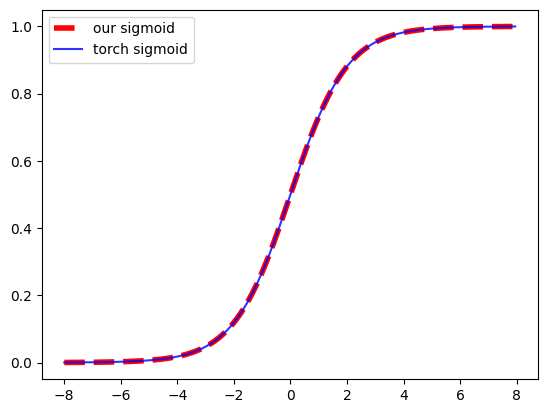

In [56]:
x = torch.arange(-8, 8, 0.05)
plt.plot(x, sigmoid(x), label='our sigmoid', ls='--', color='r', linewidth=4)
plt.plot(x, torch.sigmoid(x), label='torch sigmoid', c='b', alpha=0.8)
plt.legend()

In [57]:
X = torch.rand(3, 3)
print(
    'X:', X, 
    'Our softmax(x):', softmax(X, dim=0),
    'Torch softmax(x):', torch.softmax(X, dim=0), 
    'Sanity check: row sums:', softmax(X, dim=0).sum(dim=0), 
    sep='\n'
)

X:
tensor([[0.3181, 0.6417, 0.7364],
        [0.2967, 0.8698, 0.2271],
        [0.1001, 0.5895, 0.4622]])
Our softmax(x):
tensor([[0.3593, 0.3120, 0.4235],
        [0.3517, 0.3919, 0.2545],
        [0.2890, 0.2961, 0.3220]])
Torch softmax(x):
tensor([[0.3593, 0.3120, 0.4235],
        [0.3517, 0.3919, 0.2545],
        [0.2890, 0.2961, 0.3220]])
Sanity check: row sums:
tensor([1., 1., 1.])


In [58]:
# We can also call softmax on a tensor
X.softmax(dim=0)

tensor([[0.3593, 0.3120, 0.4235],
        [0.3517, 0.3919, 0.2545],
        [0.2890, 0.2961, 0.3220]])

In [59]:
(torch.randn(16, 3, 4) * torch.randn(3, 4)).shape

torch.Size([16, 3, 4])

In [61]:
(torch.randn(16, 3, 4) @ torch.randn(4, 7)).shape

torch.Size([16, 3, 7])

In [63]:
torch.randn(3, 4) @ torch.randn(4, 3)

tensor([[-0.4352,  0.9920, -1.2292],
        [-0.9678, -1.3448, -2.1369],
        [ 0.2841, -0.7970,  0.6935]])